In [33]:
##Project 1 JN

#Most interested in:
""""
* Event Date - have certain planes become safer over the years?
* Purpose of Flight - are certain purposes more dangerous than others?
* Injury Severity - how severe were the injuries?
* Aircraft damage - how severe were the planes damaged?
* All columns related to injuries - most important factor is human lives, how do they fare in accidents?
* Weather Condition - what type of weather has been involved with crashes?
* Broad Phase of Flight - do certain planes not fare well in specific phases of flight?
* Report Status - do certain planes tend to have fault on the plane themselves?


Thoughts:
* Can we show that there are planes that have been in bad crashes but with minimal injuries or fatalaties? 
    If so, shows that plan is safe in the case of an accident.
* Do certain planes fare better than others in Weather Conditions?

Initial Tasks:
* DONE --- standardize column names
* DONE --- change date column to date format
* DONE --- change Inj cols with values like "Fatal(2)" to 'Fatal' b/c # fatal is taken care of in Total.Fatal.Injuries
* IN PROGRESS --- Analyze how many Null vales we have and decide how to handle

Possible Recommendations:
* which type of aircraft is safest (back it up with data related to #injuries/fatalaties and any growth in safety over time)
* which locations seem safer (see if there are areas that are more dangerous potentially due to weather)
* which purpose of flight tends to be safer (see if correlation between crashes and personal or commercial)

"""

In [102]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
#import data and save to df
aviation_df = pd.read_csv('Data/Aviation_Data.csv')
state_codes_df = pd.read_csv('Data/USState_Codes.csv')

/Users/pmjustafort/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
#Standardize column names
aviation_df = aviation_df.rename(columns = lambda x: x.replace(".", "_").lower())

#Convert event_date column to timestamp type
aviation_df['event_date'] = pd.to_datetime(aviation_df['event_date'])

In [105]:
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [106]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      90348 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88837 non-null  object        
 5   country                 88663 non-null  object        
 6   latitude                34382 non-null  object        
 7   longitude               34373 non-null  object        
 8   airport_code            50249 non-null  object        
 9   airport_name            52790 non-null  object        
 10  injury_severity         87889 non-null  object        
 11  aircraft_damage         85695 non-null  object        
 12  aircraft_category       32287 non-null  object

In [107]:
aviation_df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [108]:
aviation_df.shape

(90348, 31)

In [109]:
aviation_df['injury_severity'].head(30)

0      Fatal(2)
1      Fatal(4)
2      Fatal(3)
3      Fatal(2)
4      Fatal(1)
5     Non-Fatal
6      Fatal(4)
7     Non-Fatal
8     Non-Fatal
9     Non-Fatal
10    Non-Fatal
11    Non-Fatal
12    Non-Fatal
13     Fatal(1)
14     Fatal(1)
15     Fatal(2)
16    Non-Fatal
17     Fatal(3)
18    Non-Fatal
19    Non-Fatal
20    Non-Fatal
21    Non-Fatal
22    Non-Fatal
23     Incident
24     Fatal(2)
25     Fatal(8)
26     Fatal(1)
27    Non-Fatal
28    Non-Fatal
29    Non-Fatal
Name: injury_severity, dtype: object

In [110]:
#Analyze injury columns and notice that we have very weird data with only Max present
aviation_df[['injury_severity','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']].describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,77488.000000,76379.000000,76956.000000,82977.000000
mean,0.647855,0.279881,0.357061,5.325440
std,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


In [111]:
#Find how many NAs in this column -> 2.7% of all entries have NA for injury_severity
aviation_df['injury_severity'].isna().sum()

#Change NAs in this column to Not Applicable for now. Can possibly change this later based on injury columns 
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].isna()] = 'Not Applicable'

#Check to confirm the replacement worked
aviation_df['injury_severity'].isna().sum()

/Users/pmjustafort/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0

In [113]:
#Change all values with Fatal() to just Fatal b/c counts are taken care of in total_fatalaties column
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].str.contains("Fatal\(.*\)")] = 'Fatal'

/Users/pmjustafort/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [114]:
#Confirm that change was successful
aviation_df['injury_severity'].value_counts()

Non-Fatal         67357
Fatal             17826
Not Applicable     2459
Incident           2219
Minor               218
Serious             173
Unavailable          96
Name: injury_severity, dtype: int64

# Checkpoint
### At this point we have completed the following:
    1. Import libraries
    2. Import data
    3. Standardize column names
    4. Change event_date type to timestamp
    5. Clean up 'injury_severity' column by replaceing NAs with 'Not Applicable' 
        and removing counts b/c are represented in total_fatalities column

# # Next Steps: 
### Make graphs to find correlations and relationships between columns
1. 
    

In [115]:
#Check to see how many Nulls in each columns
aviation_df.isna().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
latitude                  55966
longitude                 55975
airport_code              40099
airport_name              37558
injury_severity               0
aircraft_damage            4653
aircraft_category         58061
registration_number        2776
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8536
far_description           58325
schedule                  77766
purpose_of_flight          7651
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7840
publication_date          16689
dtype: i

In [116]:
aviation_df[['make','model','number_of_engines','engine_type']].value_counts()

make                      model              number_of_engines  engine_type  
Cessna                    152                1.0                Reciprocating    2157
                          172                1.0                Reciprocating    1235
                          172N               1.0                Reciprocating     986
Piper                     PA-28-140          1.0                Reciprocating     800
Cessna                    150                1.0                Reciprocating     709
                                                                                 ... 
MICHAEL BURTON            Calidus            1.0                Reciprocating       1
MICHAEL ADAMCZYK          ZENITH CH750       1.0                Reciprocating       1
MICHAEL A HOWARD          DOMINATOR          1.0                Reciprocating       1
MEYERS INDUSTRIES INC     200C               1.0                Reciprocating       1
107.5 Flying Corporation  One Design DR 107  1.0              

In [117]:
aviation_df['make'].value_counts()

Cessna                 22227
Piper                  12029
CESSNA                  4922
Beech                   4330
PIPER                   2841
                       ...  
Cecil, Richard C.          1
Calkins                    1
Dantzer Lawrence L         1
SCHABACKER KONRAD J        1
Talbott                    1
Name: make, Length: 8237, dtype: int64

# Crash By Location

In [139]:
crash_by_location_sorted = crash_by_location.sort_values('CrashCount', ascending=False)

In [120]:
top_crash_location = crash_by_location_sorted.head(10)
top_crash_location

,location,CrashCount
423,"ANCHORAGE, AK",434
15212,"MIAMI, FL",200
259,"ALBUQUERQUE, NM",196
10718,"HOUSTON, TX",193
4058,"CHICAGO, IL",184
7849,"FAIRBANKS, AK",174
24850,"TUCSON, AZ",142
19141,"PHOENIX, AZ",132
18374,"ORLANDO, FL",132
7303,"ENGLEWOOD, CO",131


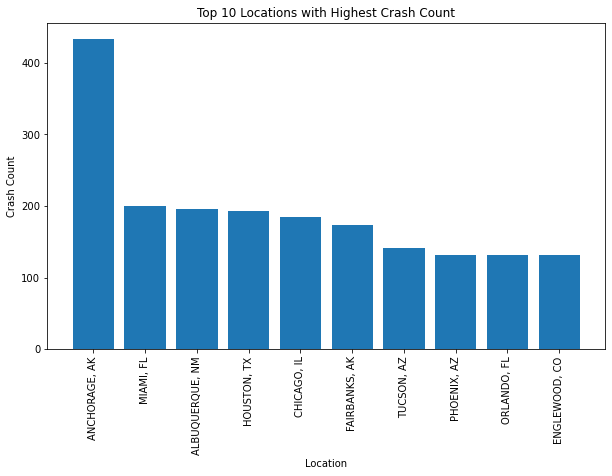

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(top_crash_location['location'], top_crash_location['CrashCount'])

# Set labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Crash Count')
ax.set_title('Top 10 Locations with Highest Crash Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Crash By Year

In [122]:
aviation_df['year'] = aviation_df['event_date'].dt.year

In [123]:
crash_by_year = aviation_df.groupby('year').size().reset_index(name='CrashCount')

In [124]:
crash_by_year_sorted = crash_by_year.sort_values('year')

In [125]:
print(crash_by_year_sorted)

      year  CrashCount
0   1948.0           1
1   1962.0           1
2   1974.0           1
3   1977.0           1
4   1979.0           2
5   1981.0           1
6   1982.0        3593
7   1983.0        3556
8   1984.0        3457
9   1985.0        3096
10  1986.0        2880
11  1987.0        2828
12  1988.0        2730
13  1989.0        2544
14  1990.0        2518
15  1991.0        2462
16  1992.0        2355
17  1993.0        2313
18  1994.0        2257
19  1995.0        2309
20  1996.0        2187
21  1997.0        2148
22  1998.0        2226
23  1999.0        2209
24  2000.0        2220
25  2001.0        2063
26  2002.0        2020
27  2003.0        2085
28  2004.0        1952
29  2005.0        2031
30  2006.0        1851
31  2007.0        2016
32  2008.0        1893
33  2009.0        1783
34  2010.0        1786
35  2011.0        1850
36  2012.0        1835
37  2013.0        1561
38  2014.0        1535
39  2015.0        1582
40  2016.0        1664
41  2017.0        1638
42  2018.0 

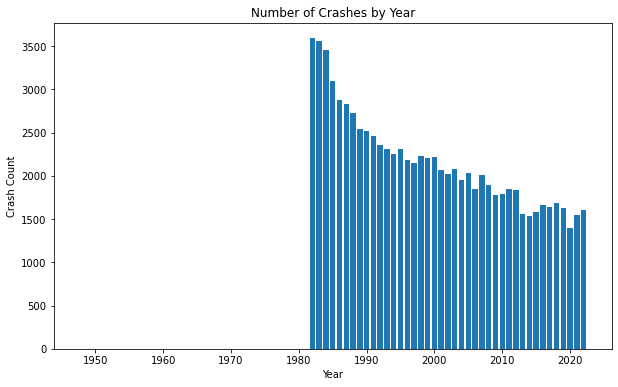

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(crash_by_year_sorted['year'], crash_by_year_sorted['CrashCount'])

ax.set_xlabel('Year')
ax.set_ylabel('Crash Count')
ax.set_title('Number of Crashes by Year')

plt.show()

# Fatalities By Model

In [164]:
aviation_df['make'] = aviation_df['make'].str.lower().str.capitalize()

In [158]:
aviation_df.shape

(90348, 32)

In [155]:
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979.0


In [175]:
aviation_df.tail()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022.0
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022,2022.0


In [143]:
fatalities_by_model = aviation_df.groupby('model')['total_fatal_injuries'].sum().reset_index()

In [144]:
fatalities_by_model_sorted = fatalities_by_model.sort_values('total_fatal_injuries', ascending=False)

In [145]:
top_fatalities_by_model = fatalities_by_model_sorted.head(10)
top_fatalities_by_model

,model,total_fatal_injuries
1521,737,1348.0
1557,737-200,906.0
1829,777 - 206,534.0
2187,A320,513.0
7574,MD-82,439.0
314,172N,430.0
263,172,400.0
4744,DC-9-32,396.0
204,152,392.0
8532,PA-28-181,381.0


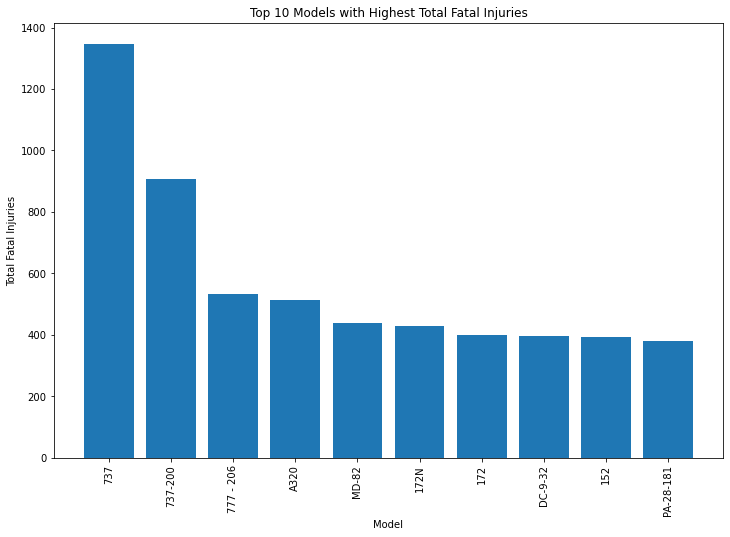

In [173]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(top_fatalities_by_model['model'], top_fatalities_by_model['total_fatal_injuries'])

ax.set_xlabel('Model')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Top 10 Models with Highest Total Fatal Injuries')

plt.xticks(rotation=90)

plt.show()

In [147]:
lowest_fatalities_by_model = fatalities_by_model_sorted.tail(10)
lowest_fatalities_by_model

,model,total_fatal_injuries
5055,Dakota Hawk DH23,0.0
5058,Debus-Casst-Snoshoo,0.0
5068,Dornier 328-300,0.0
5059,Defiant,0.0
5061,Discus 2b,0.0
5062,Discus B,0.0
5064,Discus-2CT,0.0
5065,Discus-CS,0.0
5066,Discuss B,0.0
6159,GV-SP,0.0


Interpretation:
Commercial planes generally have more fatalities in the event of a crash due to the larger number of passengers they carry. 

# Fatalities By Make.

In [148]:
fatalities_by_make = aviation_df.groupby('make')['total_fatal_injuries'].sum().reset_index()

In [149]:
fatalities_by_make_sorted = fatalities_by_make.sort_values('total_fatal_injuries', ascending=False)

In [151]:
top_fatalities_by_make = fatalities_by_make_sorted.head(10)
top_fatalities_by_make

,make,total_fatal_injuries
1259,Cessna,9641.0
827,Boeing,8748.0
5276,Piper,6689.0
638,Beech,3784.0
658,Bell,1332.0
175,Airbus,1325.0
4489,Mcdonnell douglas,1286.0
181,Airbus industrie,1174.0
1959,Douglas,984.0
4753,Mooney,685.0


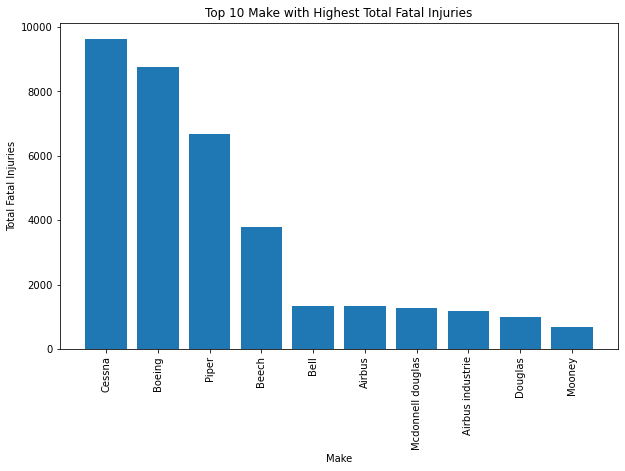

In [152]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(top_fatalities_by_make['make'], top_fatalities_by_make['total_fatal_injuries'])

ax.set_xlabel('Make')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Top 10 Make with Highest Total Fatal Injuries')

plt.xticks(rotation=90)

plt.show()

In [153]:
lowest_fatalities_by_make = fatalities_by_make_sorted.tail(10)
lowest_fatalities_by_make

,make,total_fatal_injuries
3075,Haxton,0.0
3074,Hawley richard,0.0
3073,Hawkins william,0.0
3072,Hawkins august e,0.0
3071,Hawkins & powers,0.0
3068,Hawker siddely,0.0
3058,Hawk,0.0
3056,"Hauser, william c.",0.0
3055,Hauser u/hauser j,0.0
7586,Zwicker murray r,0.0


In [165]:
crashes_by_number_of_engines = aviation_df.groupby('number_of_engines').size()
crashes_by_number_of_engines

number_of_engines
0.0     1226
1.0    69582
2.0    11079
3.0      483
4.0      431
6.0        1
8.0        3
dtype: int64

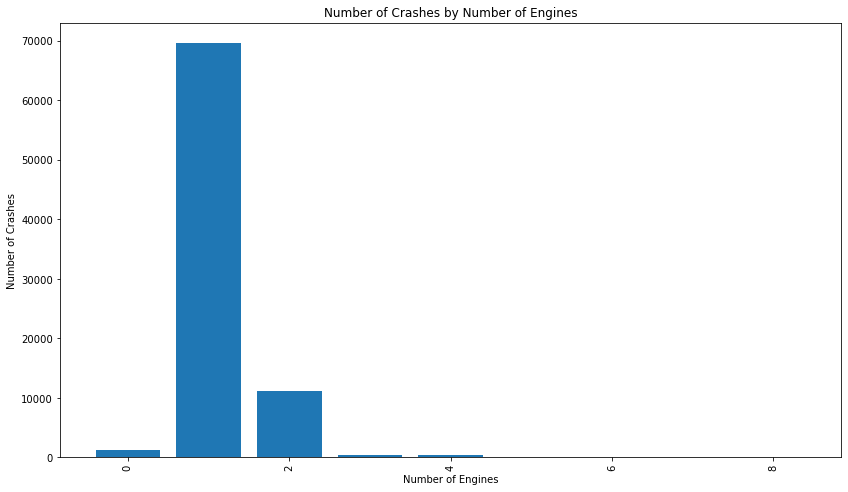

In [172]:
plt.figure(figsize=(14, 8))
plt.bar(crashes_by_number_of_engines.index, crashes_by_number_of_engines.values)

plt.xlabel('Number of Engines')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Number of Engines')

plt.xticks(rotation=90)

plt.show()

In [167]:
crashes_by_engine_type = aviation_df.groupby('engine_type').size()
crashes_by_engine_type


engine_type
Electric              10
Geared Turbofan       12
Hybrid Rocket          1
LR                     2
NONE                   2
None                  19
Reciprocating      69530
Turbo Fan           2481
Turbo Jet            703
Turbo Prop          3391
Turbo Shaft         3609
UNK                    1
Unknown             2051
dtype: int64

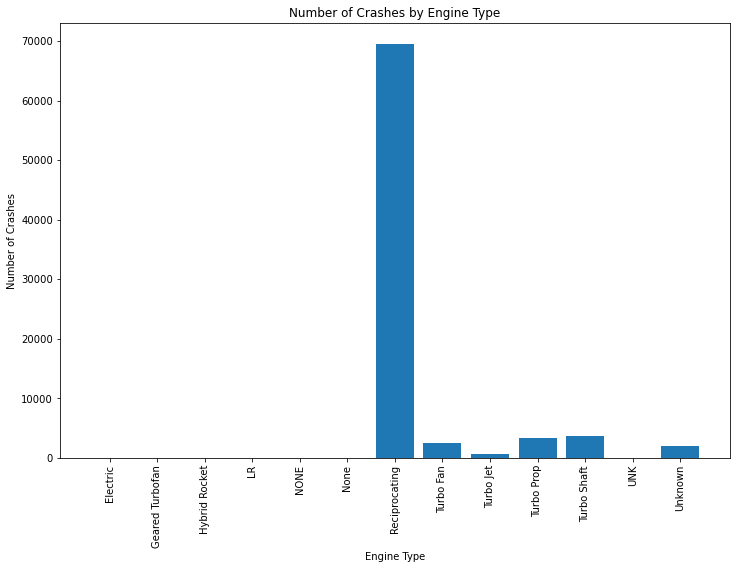

In [171]:
plt.figure(figsize=(12, 8))
plt.bar(crashes_by_engine_type.index, crashes_by_engine_type.values)

plt.xlabel('Engine Type')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Engine Type')

plt.xticks(rotation=90)

plt.show()
